# 심화문제 exercise

#### 20210673 이경미

### 8.1 다음 코드는 사이킷런에서 제공하는 당뇨병 환자의 데이터를 읽어 들이는 코드이다.

In [1]:
from sklearn import datasets

#당뇨병 데이터 세트를 sklearn의 데이터집합으로부터 읽어 들인다.
diabetes=datasets.load_diabetes()
print('shape of diabetes.data: ',diabetes.data.shape)


shape of diabetes.data:  (442, 10)


>>#실행결과  
shape of diabetes.data: (442,10)

### 사이킷런에서 제공하는 이 데이터는 10개의 특성을 가지는 442개의 데이터인데, diabetes.target 이라는 속성에는 이 특성을 가진 442명의 환자들이 1년 후에 당뇨 수치가 얼마나 진행되었는가를 알 수 있는 값들이 있다.

1)이 데이터를 70%의 훈련용 데이터와 30%의 테스트용 데이터로 나누도록 하자.  
2) 이 데이터에서 체질량 자수(BMI) 속성을 이용하여 당뇨 수치를 예측하는 선형 회귀 모델을 만들자.  
3)2)번 문제에서 만든 선형 회귀 모델의 예측 점수를 구해보자. 또한 테스트용 데이터에 대하여 이 모델의 점수를 구해보자.  

=== BMI 속성을 학습에 사용한 결과 ====  
훈련 데이터의 점수: 51.47%  
테스트 데이터의 점수:50.03%  

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1) 70%의 훈련용 데이터와 30%의 테스트용 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(diabetes.data[:, 2:3], diabetes.target, test_size=0.3, random_state=42)

# 2) 체질량 지수(BMI) 속성을 이용하여 선형 회귀 모델 만들기
regr= LinearRegression()
regr.fit(X_train, y_train)

# 3) 훈련용 데이터에 대한 예측 점수 구하기
train_predictions =regr.predict(X_train)
train_score =regr.score(X_train, y_train)

# 테스트용 데이터에 대한 예측 점수 구하기
test_predictions = regr.predict(X_test)
test_score = regr.score(X_test, y_test)

print("=== BMI 속성을 학습에 사용한 결과 ===")
print(f"훈련 데이터의 점수: {train_score * 100:.2f}%")
print(f"테스트 데이터의 점수: {test_score * 100:.2f}%")


=== BMI 속성을 학습에 사용한 결과 ===
훈련 데이터의 점수: 36.58%
테스트 데이터의 점수: 28.03%


### 4)당뇨 수치는 25~364 사이의 정수값이다. 이를 StandardScaler를 사용하여 -1에서 1사이의 실수 값으로 스케일링하여 출력하여라

표준화 이전 혈당값  
    [151.   75.  141. 206.   135.]  
표준화 이후 혈당값  
    [-0.01471948  -1.00165882  -0.14457991  0.69951294 -0.22249618]  

In [3]:
from sklearn.preprocessing import StandardScaler

#원본 데이터
diabetes_values = [151., 75., 141., 206., 135.]

print("표준화 이전 혈당값")
print(diabetes_values)

new_values=[[value] for value in diabetes_values]

# StandardScaler를 이용하여 표준화
ss = StandardScaler()
diabetes_scaled = ss.fit_transform(new_values)

print("표준화 이후 혈당값")
print(diabetes_scaled.flatten())

표준화 이전 혈당값
[151.0, 75.0, 141.0, 206.0, 135.0]
표준화 이후 혈당값
[ 0.22515115 -1.59521988 -0.01437135  1.54252493 -0.15808485]


### 5) 당뇨 수치와 각 속성들의 상관관계를 구해보자. 이 상관관계를 다음과 같은 히트맵으로 그려보자
(힌트: 목표값과 10개의 속성값을 넘파이의 append()함수를 사용하여 하나의 넘파이 배열에 넣자. 다음으로 이 데이터를 사용하여 상관관계를 구한 후 시본의 heatmap()함수로 그려보자).

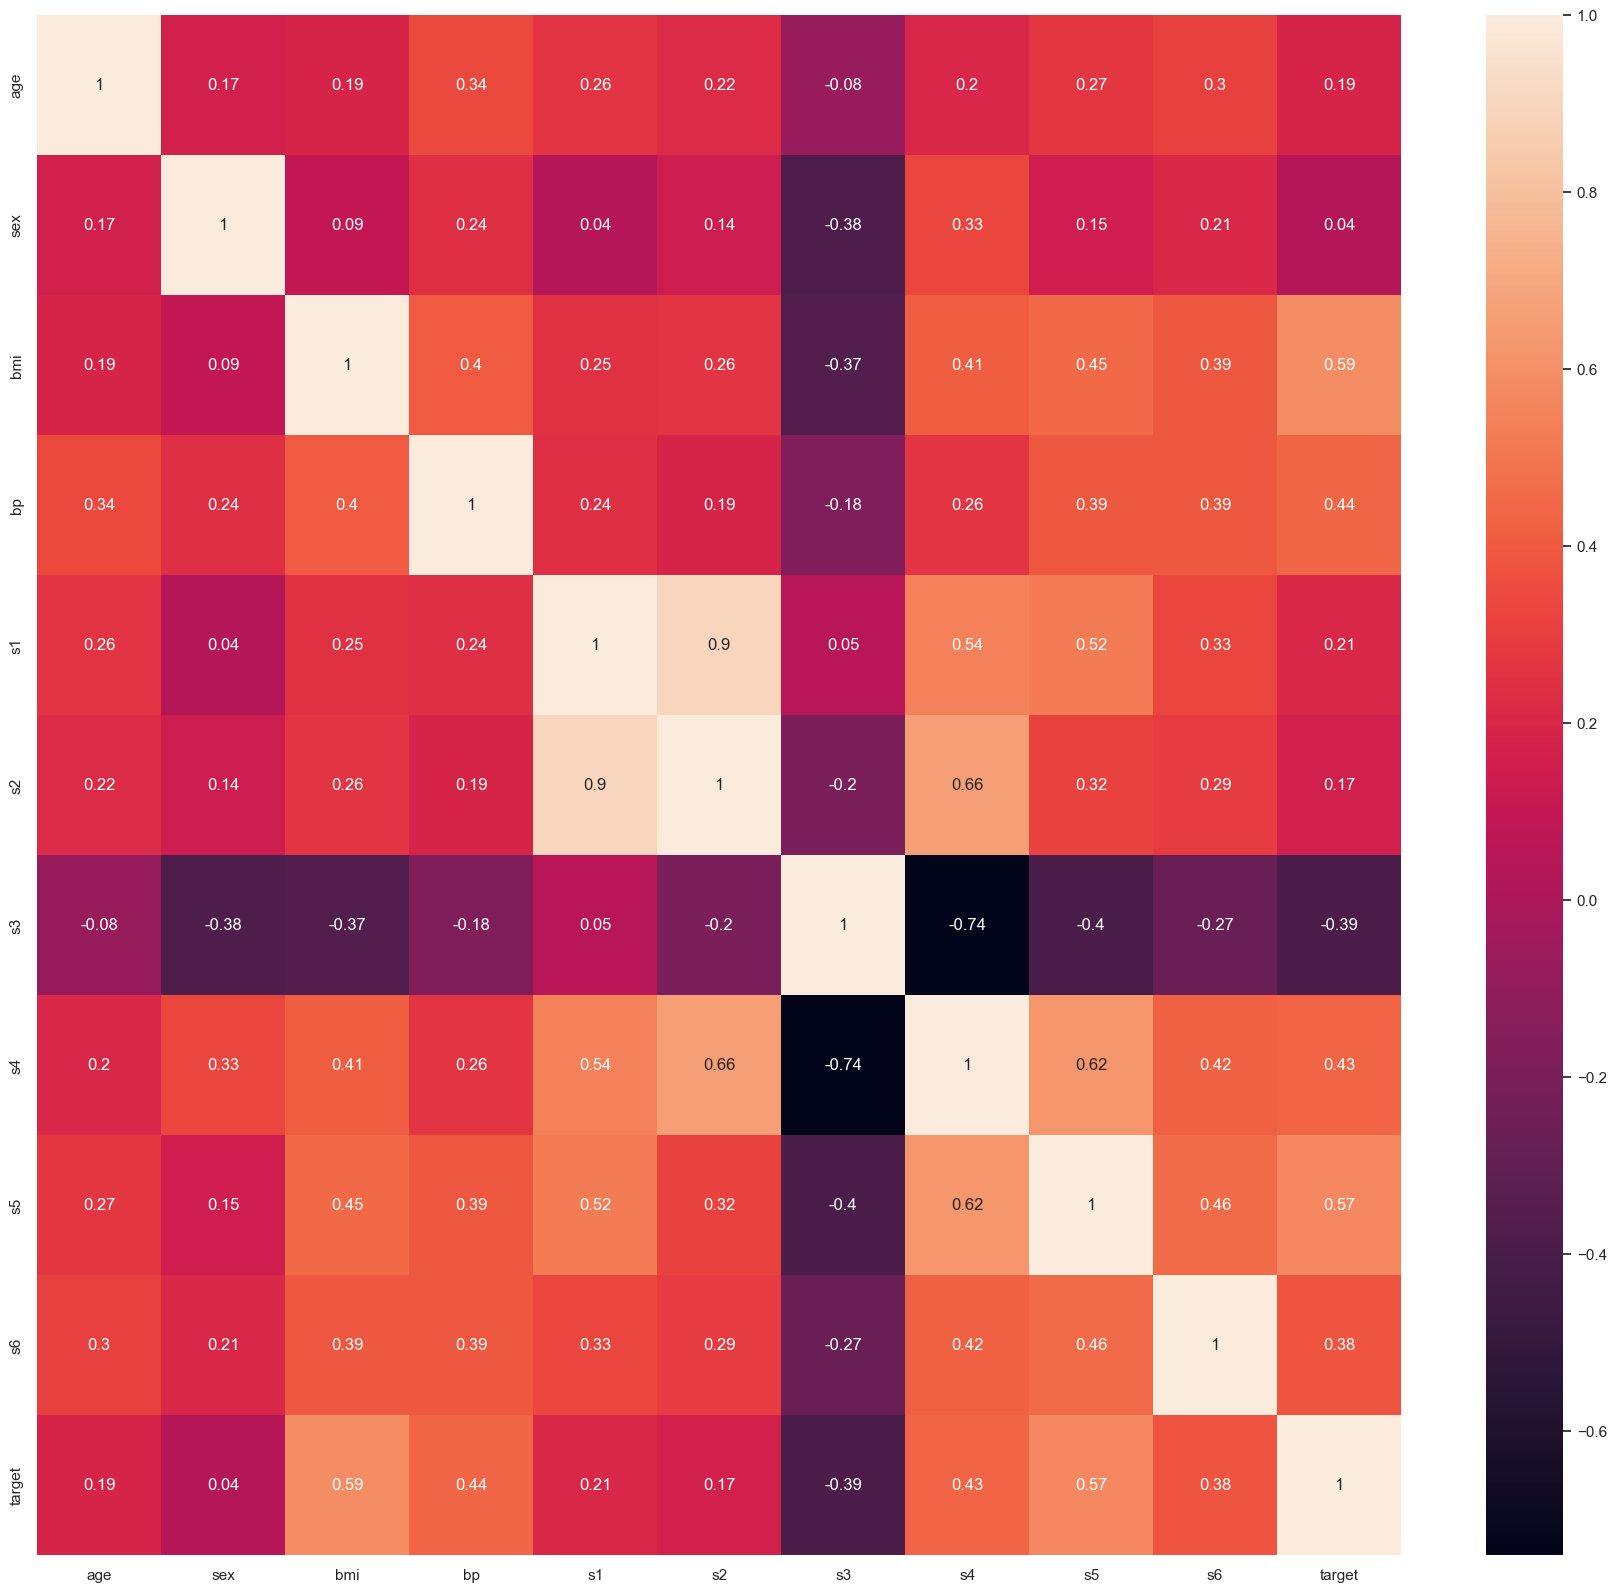

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets

# 당뇨병 데이터 로드
diabetes = datasets.load_diabetes()
data = np.append(diabetes.data, diabetes.target.reshape(-1, 1), axis=1)
columns = np.append(diabetes.feature_names, 'target')
df = pd.DataFrame(data, columns=columns)

# 상관관계 행렬
correlation_matrix = df.corr().round(2)

# 히트맵
sns.set(rc={'figure.figsize':(22, 20)})
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()


### 6)이를 바탕으로 상관도가 높은 3개의 속성의 인덱스와 상관계수를 출력 해보자.
인덱스  상관계수  
3        0.59  
9        0.57  
4        0.44  

In [5]:
# 상관계수
corr_with_target = df.corr().iloc[:-1, -1]

# 상관계수를 절댓값으로 변환,내림차순 정렬
sorted_corr = corr_with_target.abs().sort_values(ascending=False)

# 상위 3개 속성의 인덱스와 상관계수 출력
top_3_indices = sorted_corr.head(3).index
top_3_corr = sorted_corr.head(3).values

# 결과 출력
print("인덱스  상관계수")
for idx, corr in zip(top_3_indices, top_3_corr):
    idx_numeric = df.columns.get_loc(idx)  # 변수명을 숫자로 변환
    print(f"{idx_numeric}\t{corr:.2f}")

인덱스  상관계수
2	0.59
8	0.57
3	0.44


### 7) 이 상관도를 참고하여 3개의 속성을 입력으로 사용하는 모델을 만들고 모델의 예측 점수를 구해보자. 또한 테스트용 데이터에 대하여 이 모델의 점수를 구해보자.

==== 3개 속성을 학습에 사용한 결과====  
훈련 데이터의 점수:0.5316064203437351  
테스트 데이터의 점수:0.4707703126928533  

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 3개의 상관도가 높은 속성 선택
selected_features = ['bmi', 's5', 'bp']
X_selected = df[selected_features]
y = df['target']

#훈련용과 테스트용으로 나누기
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# 선형 회귀 모델 만들기
regr_selected = LinearRegression()

# 모델 훈련
regr_selected.fit(X_train, y_train)

# 훈련 데이터에 대한 예측 점수 구하기
train_predictions_selected = regr_selected.predict(X_train)
train_score_selected = r2_score(y_train, train_predictions_selected)

# 테스트 데이터에 대한 예측 점수 구하기
test_predictions_selected = regr_selected.predict(X_test)
test_score_selected = r2_score(y_test, test_predictions_selected)

# 결과 출력
print("==== 3개 속성을 학습에 사용한 결과 ====")
print(f"훈련 데이터의 점수: {train_score_selected}")
print(f"테스트 데이터의 점수: {test_score_selected}")


==== 3개 속성을 학습에 사용한 결과 ====
훈련 데이터의 점수: 0.47451696599531024
테스트 데이터의 점수: 0.47717443352284294


### 8)diabetes 데이터의 모든 속성을 사용하여 모델을 만들고 모델의 예측 점수를 구해보자. 또한 테스트용 데이터에 대하여 이 모델의 점수를 구해보자.
==== 전체 속성을 학습에 사용한 결과 ====  
훈련 데이터의 점수:0.531606420347351  
테스트 데이터의 점수:0.4707703126928533  

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 모든 속성 사용
X_all = df.drop('target', axis=1)
y_all = df['target']

# 훈련용과 테스트용으로 나누기
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.3, random_state=42)

# 선형 회귀 모델
model_all = LinearRegression()

# 모델 훈련
model_all.fit(X_train_all, y_train_all)

# 훈련 데이터에 대한 예측 점수
train_predictions_all = model_all.predict(X_train_all)
train_score_all = r2_score(y_train_all, train_predictions_all)

# 테스트 데이터에 대한 예측 점수
test_predictions_all = model_all.predict(X_test_all)
test_score_all = r2_score(y_test_all, test_predictions_all)

print("==== 전체 속성을 학습에 사용한 결과 ====")
print(f"훈련 데이터의 점수: {train_score_all}")
print(f"테스트 데이터의 점수: {test_score_all}")


==== 전체 속성을 학습에 사용한 결과 ====
훈련 데이터의 점수: 0.5244124363545944
테스트 데이터의 점수: 0.4772897164322617


### 참고:7,8번 풀때, 수업시간에 배운 MSE를 사용하려고 했는데
==== 전체 속성을 학습에 사용한 결과 ====  
훈련 데이터의 점수: 2924.0463790726394  
테스트 데이터의 점수: 2821.7509810013107  
### 결과가 이상하게 나와 구글링을 통해 R-squared (R²)를 사용했습니다.